In [1]:
%matplotlib inline

In [2]:
import numpy as np
import gc
import pickle

In [3]:
"""
# This is used to calculate metric using different fpfh_radius and tree number 
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from Utils import feature_extraction
scoring = {'ACC': 'accuracy',
          'F1_micro': 'f1_micro',
          'F1_macro': 'f1_macro',
          'F1_weighted': 'f1_weighted',
          'Pre_weighted': 'precision_weighted',
          'Re_weighted': 'recall_weighted'}

average_scores = {'fit_time': [],
                 'score_time': [],
                 'test_ACC': [],
                 'test_F1_macro': [],
                 'test_F1_micro': [],
                 'test_F1_weighted': [],
                 'test_Pre_weighted': [],
                 'test_Re_weighted': []}

for radius in range(2, 16, 1):      # fpfh radius
    train_data = np.loadtxt('./Vaihingen/fpfh_ground/Vaihingen3D_Traininig_fpfh_{}_ground.txt'.format(radius), skiprows=11)
    train_data_feature = feature_extraction(train_data)
    train_data_class = train_data[:, 34]
    for n_estimators in range(5, 101, 5):     # tree number
        clf = RandomForestClassifier(n_estimators=n_estimators, max_features='auto', random_state=0, n_jobs=-1)
        scores = cross_validate(clf, train_data_feature, train_data_class, scoring=scoring, cv=5, return_train_score=False, n_jobs=-1)
        
        for key in scores.keys():
            average_scores[key].append(scores[key].mean())
            
        print('radius = {}, n_estimators = {} is processing end'.format(radius, n_estimators))
    del train_data, train_data_feature, train_data_class
    gc.collect()

with open('./result/tmp/average_scores.pkl', 'wb') as f:       # save result
    pickle.dump(average_scores, f, pickle.HIGHEST_PROTOCOL)
"""

"\n# This is used to calculate metric using different fpfh_radius and tree number \nfrom sklearn.externals import joblib\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.model_selection import cross_validate\n\nfrom Utils import feature_extraction\nscoring = {'ACC': 'accuracy',\n          'F1_micro': 'f1_micro',\n          'F1_macro': 'f1_macro',\n          'F1_weighted': 'f1_weighted',\n          'Pre_weighted': 'precision_weighted',\n          'Re_weighted': 'recall_weighted'}\n\naverage_scores = {'fit_time': [],\n                 'score_time': [],\n                 'test_ACC': [],\n                 'test_F1_macro': [],\n                 'test_F1_micro': [],\n                 'test_F1_weighted': [],\n                 'test_Pre_weighted': [],\n                 'test_Re_weighted': []}\n\nfor radius in range(2, 16, 1):      # fpfh radius\n    train_data = np.loadtxt('./Vaihingen/fpfh_ground/Vaihingen3D_Traininig_fpfh

In [4]:
# open the metric get
with open('./result/tmp/average_scores.pkl', 'rb') as f:
    average_scores = pickle.load(f)

ACC = np.array(average_scores['test_ACC'])
ACC = ACC.reshape([14, 20])

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.style

In [6]:
mpl.style.use('default')
mpl.rcParams["figure.figsize"] = [3.5, 3.5]
mpl.rcParams["figure.dpi"] = 600
mpl.rcParams["font.size"] = 7
mpl.rcParams["font.family"] = 'sans-serif'
mpl.rcParams["font.sans-serif"] = 'Arial'
mpl.rcParams["mathtext.fontset"] = 'cm'
mpl.rcParams['text.usetex'] = False

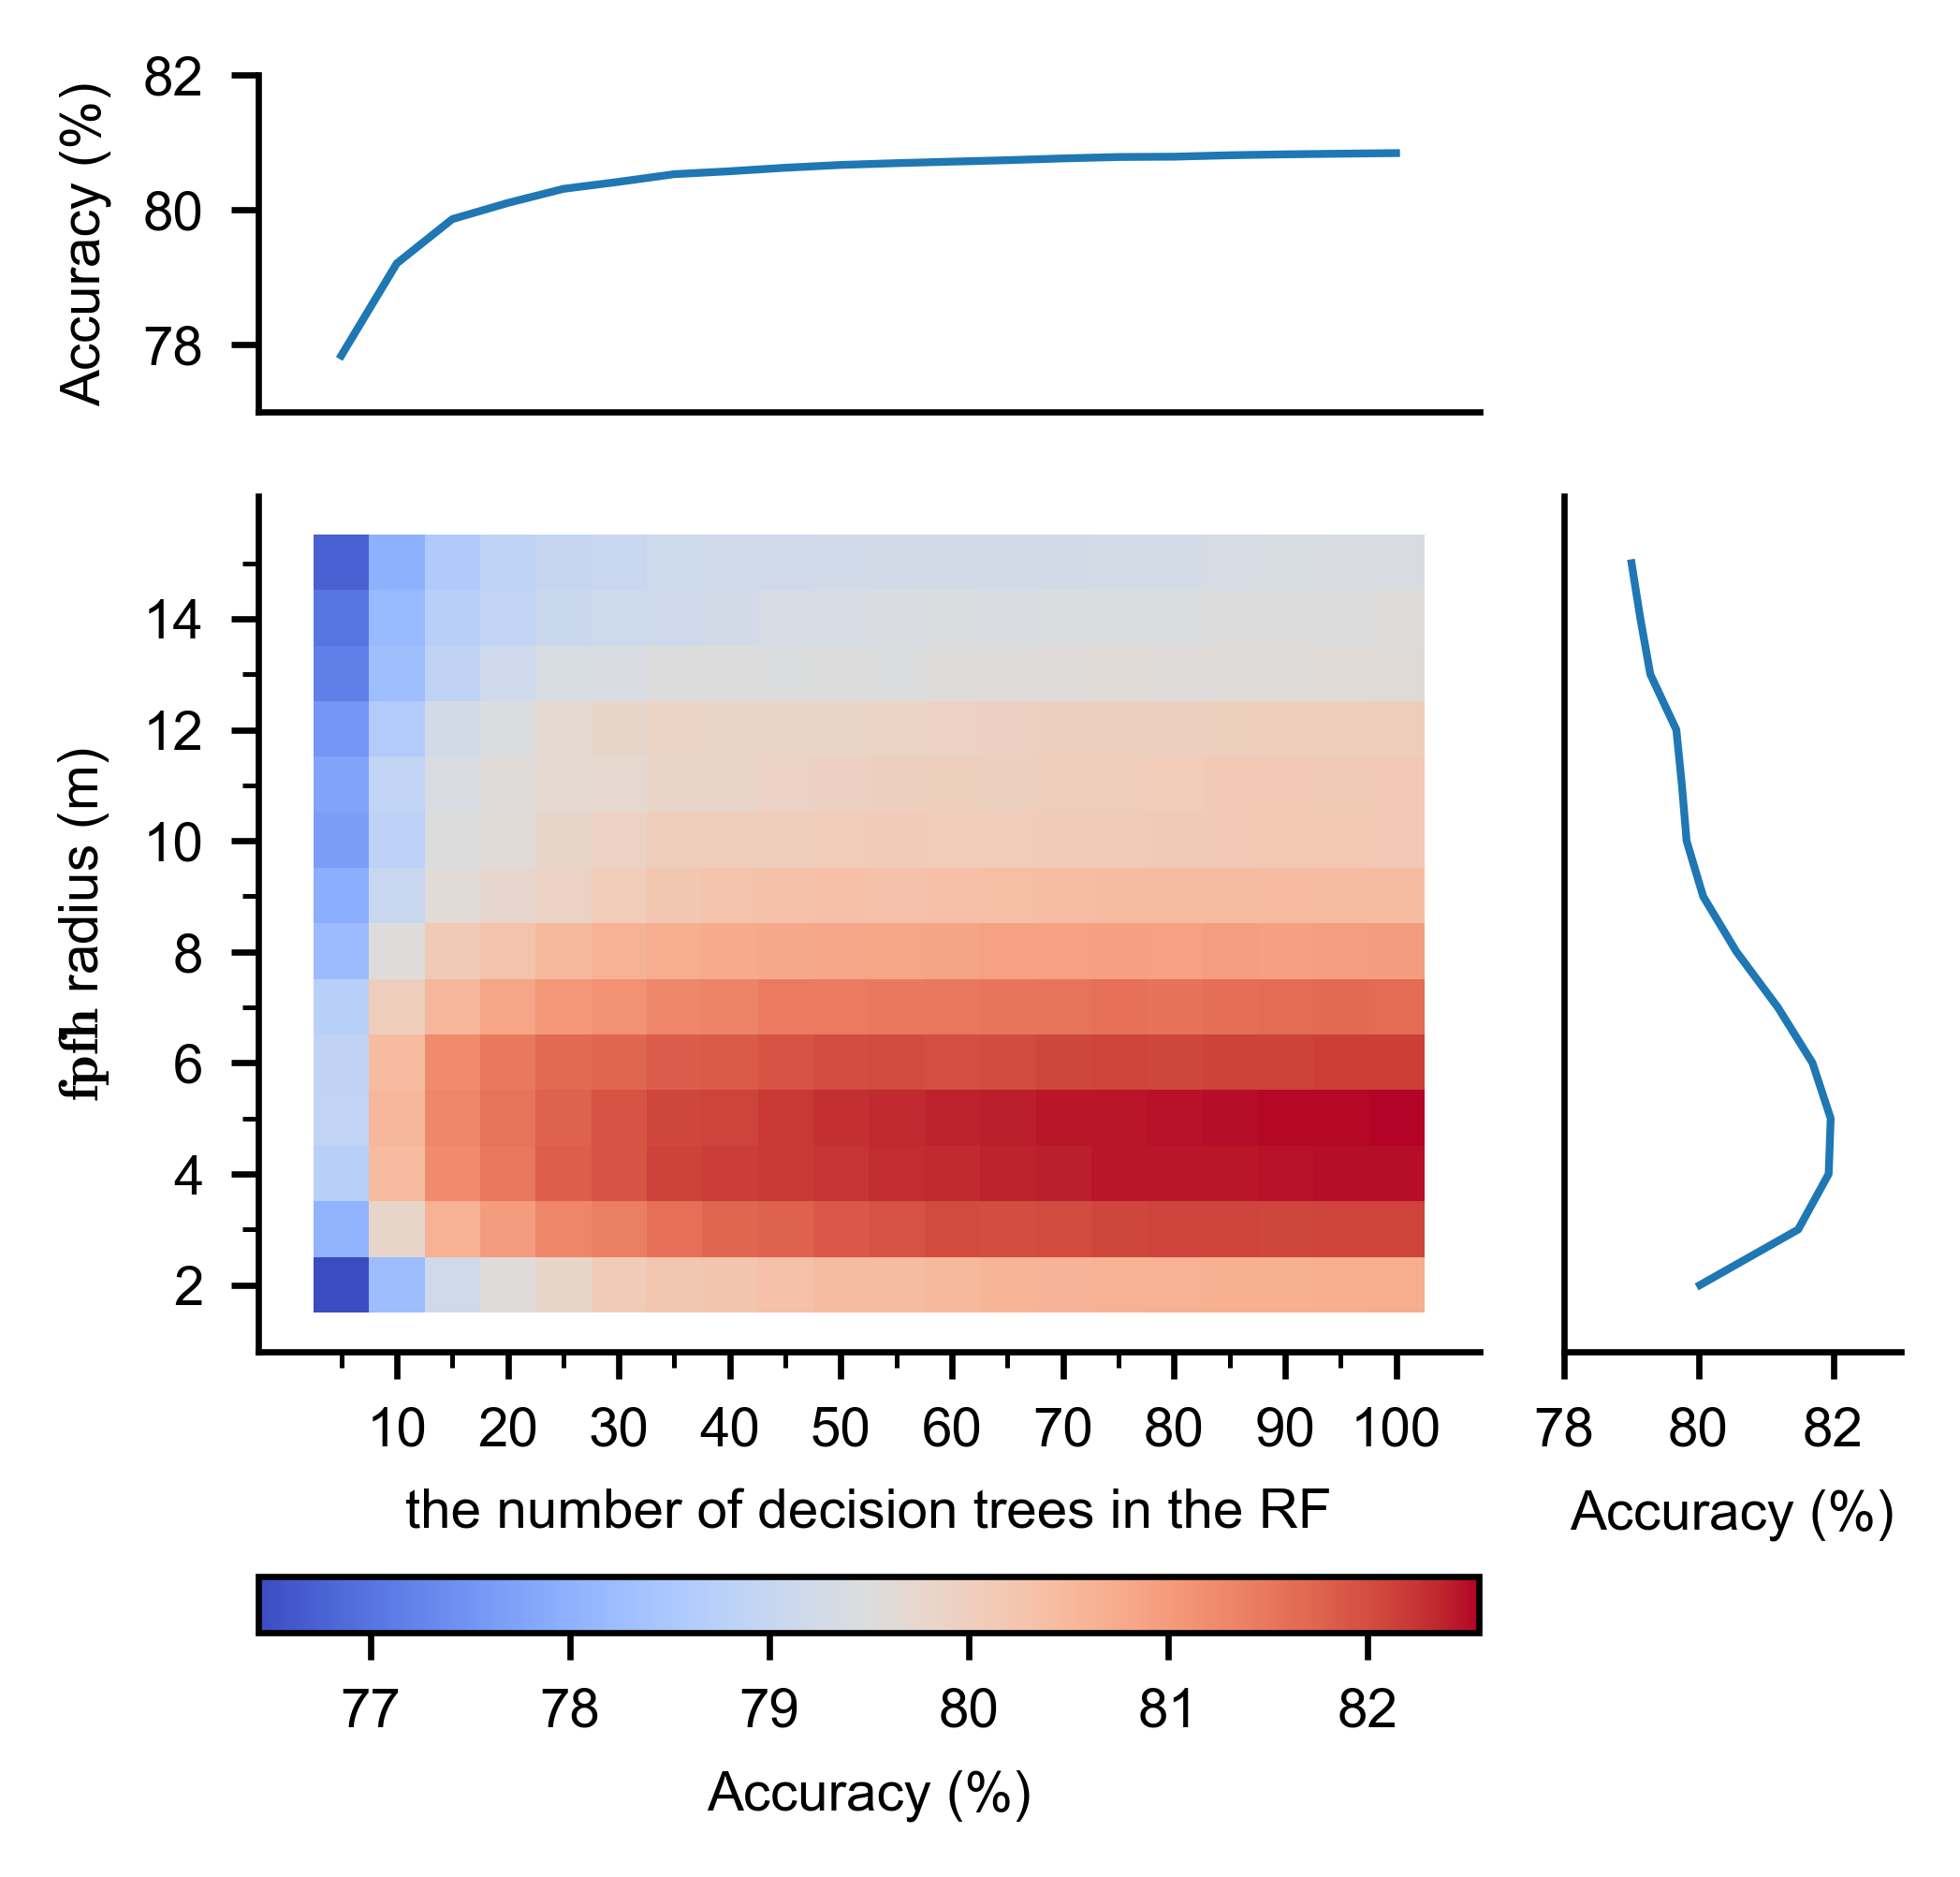

In [7]:
fig, ax = plt.subplots()
# Reverse the order of elements in an array along col axis.
ACC_flip = np.flip(ACC, axis=0)
im = ax.imshow(ACC_flip*100, interpolation='nearest', cmap=plt.cm.coolwarm)


tick_marks_x = np.arange(1,20,2)
minor_xticks = np.arange(0,20,1)

ax.set_xticks(minor_xticks, minor=True)
ax.set_xticks(tick_marks_x)
ax.set_xticklabels(np.arange(10, 101, 10))

tick_marks_y = np.arange(1,15,2)
minor_yticks = np.arange(0,14,1)

ax.set_yticks(minor_yticks, minor=True)
ax.set_yticks(tick_marks_y)
ax.set_yticklabels(np.flip(np.arange(2,15,2)))


# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(ax)
axHistx = divider.append_axes("top", size=0.6, pad=0.15, sharex=ax)
axHisty = divider.append_axes("right", size=0.6, pad=0.15, sharey=ax)

axHistx.plot(np.arange(0,20,1), np.average(ACC_flip, axis=0), linewidth=1)
axHistx.set_ylim(0.77, 0.82)
axHistx.set_yticks([0.78, 0.80, 0.82])
axHistx.set_yticklabels([78, 80, 82])
axHistx.spines['top'].set_visible(False)
axHistx.spines['right'].set_visible(False)
axHistx.set_ylabel('Accuracy (%)')
axHistx.xaxis.set_tick_params(which='both',bottom=False, labelbottom=False)


axHisty.plot(np.average(ACC_flip, axis=1), np.arange(0,14,1), linewidth=1)
axHisty.set_xlim(0.78, 0.83)
axHisty.set_xticks([0.78, 0.80, 0.82, ])
axHisty.set_xticklabels([78, 80, 82])
axHisty.set_xlabel('Accuracy (%)')
axHisty.spines['top'].set_visible(False)
axHisty.spines['right'].set_visible(False)
axHisty.yaxis.set_tick_params(which='both', left=False, labelleft=False)


ax.set_xlabel('the number of decision trees in the RF')
ax.set_ylabel(r'$\mathbf{fpfh}$ radius (m)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

cax = divider.append_axes("bottom", size=0.1, pad =0.4)
ax.figure.colorbar(im, cax=cax, orientation='horizontal', pad=0.05 )
cax.set_xlabel('Accuracy (%)')

plt.tight_layout()
fig.savefig('./parameter_identification/fpfhRadius_treeNumber.png')